

```
`# This is formatted as code`
```

# Preparing Text Data

### Import Libraries

### Load Data and Handling Missing Value

In [ ]:
!pip install contractions

In [ ]:
import nltk as nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions

In [ ]:
reviews_data = pd.read_csv("/content/sample_data/datasb.csv")
reviews_data.head()

<ipython-input-43-dad1531aff00>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_data = pd.read_csv("/content/sample_data/datasb.csv")


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fbc42248-83e9-4193-95fa-b524125f673f,Brittany Biegajski,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app is really, really easy to use and I lo...",4,7,6.60,2023-11-23 22:09:50,NaN,NaN,6.60
1,6e53e41e-2c0c-43a4-8068-50942abd5b57,Dan Welsh,https://play-lh.googleusercontent.com/a/ACg8oc...,This app worked just fine until I upgraded to ...,4,442,6.58,2023-10-14 11:57:16,NaN,NaN,6.58
2,2c2aab7f-aef2-478f-9dac-526b5d426f71,Angela Gomez,https://play-lh.googleusercontent.com/a-/ALV-U...,Pixel 8 Pro here. App doesn't allow me to logi...,1,229,6.58,2023-10-17 21:47:29,NaN,NaN,6.58
3,0608002c-59cd-4fa0-9854-498988d71eed,Jul ofDenial,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app is useful and reliable for ordering, r...",2,140,6.56,2023-09-15 18:34:17,NaN,NaN,6.56
4,13c366ea-6301-4eda-81cd-40549c1d963a,Nikki Hyrule Savior,https://play-lh.googleusercontent.com/a-/ALV-U...,Keeps breaking where I can't sign in for a mon...,2,278,6.56,2023-09-14 19:25:36,NaN,NaN,6.56


In [ ]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214920 entries, 0 to 214919
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              214920 non-null  object
 1   userName              214919 non-null  object
 2   userImage             214920 non-null  object
 3   content               214772 non-null  object
 4   score                 214920 non-null  int64 
 5   thumbsUpCount         214920 non-null  int64 
 6   reviewCreatedVersion  211092 non-null  object
 7   at                    214920 non-null  object
 8   replyContent          558 non-null     object
 9   repliedAt             558 non-null     object
 10  appVersion            211092 non-null  object
dtypes: int64(2), object(9)
memory usage: 18.0+ MB


In [ ]:
reviews_data.drop('reviewId', axis=1, inplace=True)
reviews_data.drop('userName', axis=1, inplace=True)
reviews_data.drop('userImage', axis=1, inplace=True)
reviews_data.drop('score', axis=1, inplace=True)
reviews_data.drop('reviewCreatedVersion', axis=1, inplace=True)
reviews_data.drop('at', axis=1, inplace=True)
reviews_data.drop('replyContent', axis=1, inplace=True)
reviews_data.drop('repliedAt', axis=1, inplace=True)
reviews_data.drop('appVersion', axis=1, inplace=True)

In [ ]:
reviews_data.isnull().sum()

content          148
thumbsUpCount      0
dtype: int64

In [ ]:
reviews_data.dropna(inplace=True)
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214772 entries, 0 to 214919
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   content        214772 non-null  object
 1   thumbsUpCount  214772 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


### Expand Contractions

In [ ]:
reviews_data['no_contractions'] = reviews_data['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])
reviews_data.head()

,content,thumbsUpCount,no_contractions
0,"The app is really, really easy to use and I lo...",7,"[The, app, is, really,, really, easy, to, use,..."
1,This app worked just fine until I upgraded to ...,442,"[This, app, worked, just, fine, until, I, upgr..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,"[Pixel, 8, Pro, here., App, does not, allow, m..."
3,"The app is useful and reliable for ordering, r...",140,"[The, app, is, useful, and, reliable, for, ord..."
4,Keeps breaking where I can't sign in for a mon...,278,"[Keeps, breaking, where, I, cannot, sign, in, ..."


In [ ]:
reviews_data['reviews_no_contractions'] = [' '.join(l) for l in reviews_data['no_contractions']]
reviews_data.head()

,content,thumbsUpCount,no_contractions,reviews_no_contractions
0,"The app is really, really easy to use and I lo...",7,"[The, app, is, really,, really, easy, to, use,...","The app is really, really easy to use and I lo..."
1,This app worked just fine until I upgraded to ...,442,"[This, app, worked, just, fine, until, I, upgr...",This app worked just fine until I upgraded to ...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,"[Pixel, 8, Pro, here., App, does not, allow, m...",Pixel 8 Pro here. App does not allow me to log...
3,"The app is useful and reliable for ordering, r...",140,"[The, app, is, useful, and, reliable, for, ord...","The app is useful and reliable for ordering, r..."
4,Keeps breaking where I can't sign in for a mon...,278,"[Keeps, breaking, where, I, cannot, sign, in, ...",Keeps breaking where I cannot sign in for a mo...


### Tokenize Data

In [ ]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_no_contractions'].apply(word_tokenize)
reviews_data.head()

,content,thumbsUpCount,no_contractions,reviews_no_contractions,reviews_tokenized
0,"The app is really, really easy to use and I lo...",7,"[The, app, is, really,, really, easy, to, use,...","The app is really, really easy to use and I lo...","[The, app, is, really, ,, really, easy, to, us..."
1,This app worked just fine until I upgraded to ...,442,"[This, app, worked, just, fine, until, I, upgr...",This app worked just fine until I upgraded to ...,"[This, app, worked, just, fine, until, I, upgr..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,"[Pixel, 8, Pro, here., App, does not, allow, m...",Pixel 8 Pro here. App does not allow me to log...,"[Pixel, 8, Pro, here, ., App, does, not, allow..."
3,"The app is useful and reliable for ordering, r...",140,"[The, app, is, useful, and, reliable, for, ord...","The app is useful and reliable for ordering, r...","[The, app, is, useful, and, reliable, for, ord..."
4,Keeps breaking where I can't sign in for a mon...,278,"[Keeps, breaking, where, I, cannot, sign, in, ...",Keeps breaking where I cannot sign in for a mo...,"[Keeps, breaking, where, I, can, not, sign, in..."


### Convert Data to Lowercase

In [ ]:
reviews_data['reviews_lower'] = reviews_data['reviews_tokenized'].apply(lambda x: [word.lower() for word in x])
reviews_data.head()

,content,thumbsUpCount,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower
0,"The app is really, really easy to use and I lo...",7,"[The, app, is, really,, really, easy, to, use,...","The app is really, really easy to use and I lo...","[The, app, is, really, ,, really, easy, to, us...","[the, app, is, really, ,, really, easy, to, us..."
1,This app worked just fine until I upgraded to ...,442,"[This, app, worked, just, fine, until, I, upgr...",This app worked just fine until I upgraded to ...,"[This, app, worked, just, fine, until, I, upgr...","[this, app, worked, just, fine, until, i, upgr..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,"[Pixel, 8, Pro, here., App, does not, allow, m...",Pixel 8 Pro here. App does not allow me to log...,"[Pixel, 8, Pro, here, ., App, does, not, allow...","[pixel, 8, pro, here, ., app, does, not, allow..."
3,"The app is useful and reliable for ordering, r...",140,"[The, app, is, useful, and, reliable, for, ord...","The app is useful and reliable for ordering, r...","[The, app, is, useful, and, reliable, for, ord...","[the, app, is, useful, and, reliable, for, ord..."
4,Keeps breaking where I can't sign in for a mon...,278,"[Keeps, breaking, where, I, cannot, sign, in, ...",Keeps breaking where I cannot sign in for a mo...,"[Keeps, breaking, where, I, can, not, sign, in...","[keeps, breaking, where, i, can, not, sign, in..."


### Remove Punctuation

In [ ]:
punctuations = string.punctuation
reviews_data['reviews_no_punctuation'] = reviews_data['reviews_lower'].apply(lambda x: [word for word in x if word not in punctuations])
reviews_data.head()

,content,thumbsUpCount,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation
0,"The app is really, really easy to use and I lo...",7,"[The, app, is, really,, really, easy, to, use,...","The app is really, really easy to use and I lo...","[The, app, is, really, ,, really, easy, to, us...","[the, app, is, really, ,, really, easy, to, us...","[the, app, is, really, really, easy, to, use, ..."
1,This app worked just fine until I upgraded to ...,442,"[This, app, worked, just, fine, until, I, upgr...",This app worked just fine until I upgraded to ...,"[This, app, worked, just, fine, until, I, upgr...","[this, app, worked, just, fine, until, i, upgr...","[this, app, worked, just, fine, until, i, upgr..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,"[Pixel, 8, Pro, here., App, does not, allow, m...",Pixel 8 Pro here. App does not allow me to log...,"[Pixel, 8, Pro, here, ., App, does, not, allow...","[pixel, 8, pro, here, ., app, does, not, allow...","[pixel, 8, pro, here, app, does, not, allow, m..."
3,"The app is useful and reliable for ordering, r...",140,"[The, app, is, useful, and, reliable, for, ord...","The app is useful and reliable for ordering, r...","[The, app, is, useful, and, reliable, for, ord...","[the, app, is, useful, and, reliable, for, ord...","[the, app, is, useful, and, reliable, for, ord..."
4,Keeps breaking where I can't sign in for a mon...,278,"[Keeps, breaking, where, I, cannot, sign, in, ...",Keeps breaking where I cannot sign in for a mo...,"[Keeps, breaking, where, I, can, not, sign, in...","[keeps, breaking, where, i, can, not, sign, in...","[keeps, breaking, where, i, can, not, sign, in..."


### Convert Output Back to String

In [ ]:
reviews_data['reviews_cleaned'] = [' '.join(l) for l in reviews_data['reviews_no_punctuation']]
reviews_data.head()

,content,thumbsUpCount,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned
0,"The app is really, really easy to use and I lo...",7,"[The, app, is, really,, really, easy, to, use,...","The app is really, really easy to use and I lo...","[The, app, is, really, ,, really, easy, to, us...","[the, app, is, really, ,, really, easy, to, us...","[the, app, is, really, really, easy, to, use, ...",the app is really really easy to use and i lov...
1,This app worked just fine until I upgraded to ...,442,"[This, app, worked, just, fine, until, I, upgr...",This app worked just fine until I upgraded to ...,"[This, app, worked, just, fine, until, I, upgr...","[this, app, worked, just, fine, until, i, upgr...","[this, app, worked, just, fine, until, i, upgr...",this app worked just fine until i upgraded to ...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,"[Pixel, 8, Pro, here., App, does not, allow, m...",Pixel 8 Pro here. App does not allow me to log...,"[Pixel, 8, Pro, here, ., App, does, not, allow...","[pixel, 8, pro, here, ., app, does, not, allow...","[pixel, 8, pro, here, app, does, not, allow, m...",pixel 8 pro here app does not allow me to logi...
3,"The app is useful and reliable for ordering, r...",140,"[The, app, is, useful, and, reliable, for, ord...","The app is useful and reliable for ordering, r...","[The, app, is, useful, and, reliable, for, ord...","[the, app, is, useful, and, reliable, for, ord...","[the, app, is, useful, and, reliable, for, ord...",the app is useful and reliable for ordering re...
4,Keeps breaking where I can't sign in for a mon...,278,"[Keeps, breaking, where, I, cannot, sign, in, ...",Keeps breaking where I cannot sign in for a mo...,"[Keeps, breaking, where, I, can, not, sign, in...","[keeps, breaking, where, i, can, not, sign, in...","[keeps, breaking, where, i, can, not, sign, in...",keeps breaking where i can not sign in for a m...


### Export Cleaned Text Data

In [ ]:
reviews_data[['content','thumbsUpCount','reviews_cleaned']].to_csv('./cleaned_reviews_data.csv',index = False)

# Removing Stop Words

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Import Data and Handling Missing Value

In [ ]:
dataclean1 = pd.read_csv("cleaned_reviews_data.csv")
dataclean1.head()

,content,thumbsUpCount,reviews_cleaned
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...


In [ ]:
dataclean1.shape

(214772, 3)

In [ ]:
dataclean1.isnull().sum()

content              0
thumbsUpCount        0
reviews_cleaned    131
dtype: int64

In [ ]:
dataclean1.dropna(inplace=True)
dataclean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214641 entries, 0 to 214771
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   content          214641 non-null  object
 1   thumbsUpCount    214641 non-null  int64 
 2   reviews_cleaned  214641 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


### Tokenize Data

In [ ]:
dataclean1['reviews_tokenized'] = dataclean1['reviews_cleaned'].apply(word_tokenize)

### Visualise Most Common Word

In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [ ]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [ ]:
reviews = dataclean1['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['the', 'app', 'is', 'really', 'really', 'easy', 'to', 'use', 'and', 'i']

In [ ]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
0,the,140169
8,i,138244
5,to,134913
7,and,103060
46,it,100701


<Axes: xlabel='words', ylabel='word_count'>

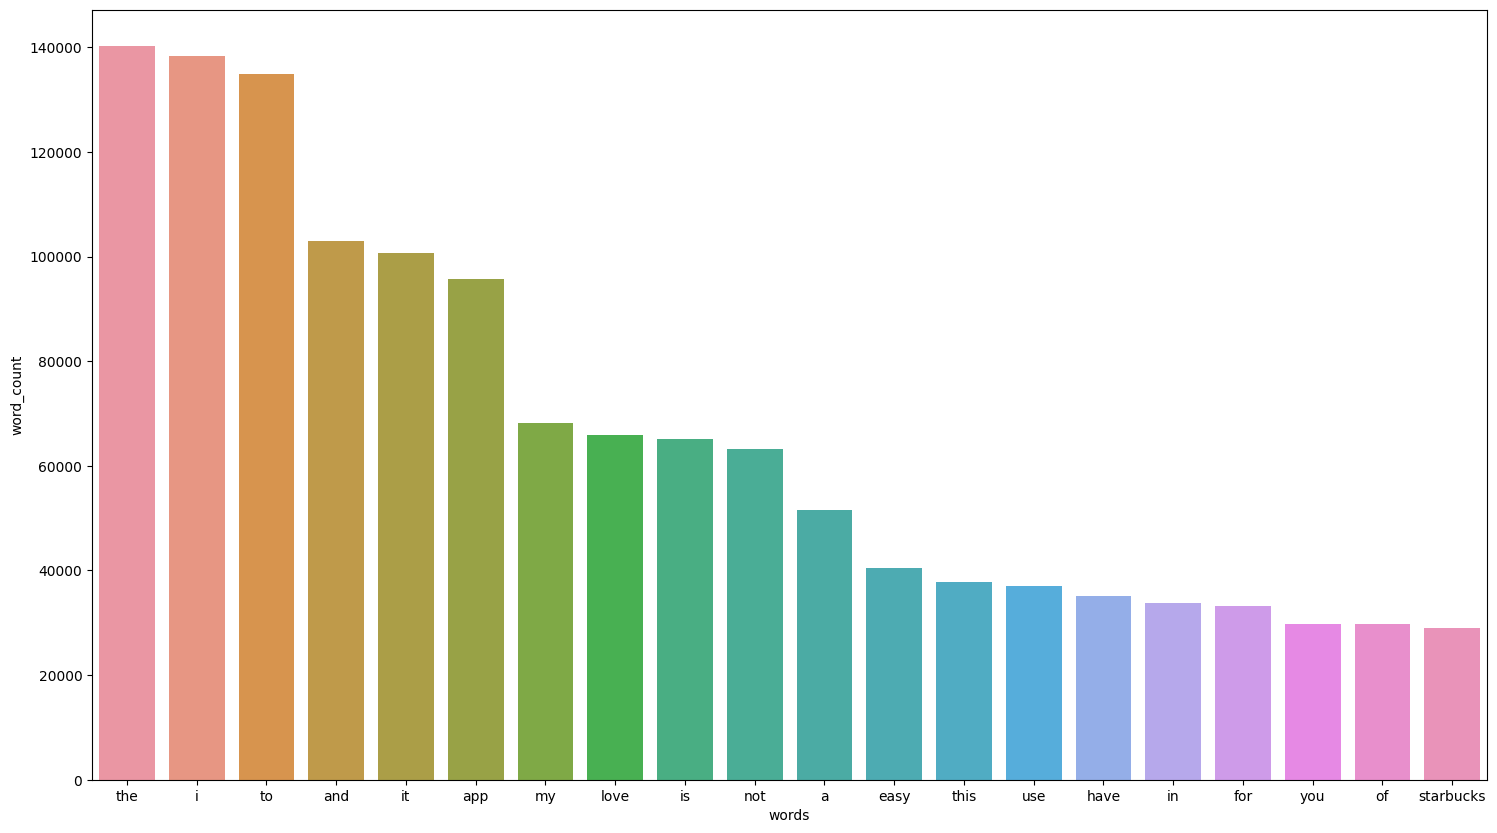

In [ ]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

### Remove Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
dataclean1['reviews_no_stopwords'] = dataclean1['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
dataclean1.head()

,content,thumbsUpCount,reviews_cleaned,reviews_tokenized,reviews_no_stopwords
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,"[the, app, is, really, really, easy, to, use, ...","[app, really, really, easy, use, love, way, ch..."
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,"[this, app, worked, just, fine, until, i, upgr...","[app, worked, fine, upgraded, new, pixel, 8, p..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,"[pixel, 8, pro, here, app, does, not, allow, m...","[pixel, 8, pro, app, allow, login, get, messag..."
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,"[the, app, is, useful, and, reliable, for, ord...","[app, useful, reliable, ordering, redeeming, r..."
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,"[keeps, breaking, where, i, can, not, sign, in...","[keeps, breaking, sign, month, finally, let, s..."


In [ ]:
dataclean1['reviews_cleaned_stopwords'] = [' '.join(l) for l in dataclean1['reviews_no_stopwords']]
dataclean1.head()

,content,thumbsUpCount,reviews_cleaned,reviews_tokenized,reviews_no_stopwords,reviews_cleaned_stopwords
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,"[the, app, is, really, really, easy, to, use, ...","[app, really, really, easy, use, love, way, ch...",app really really easy use love way choose cus...
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,"[this, app, worked, just, fine, until, i, upgr...","[app, worked, fine, upgraded, new, pixel, 8, p...",app worked fine upgraded new pixel 8 pro andro...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,"[pixel, 8, pro, here, app, does, not, allow, m...","[pixel, 8, pro, app, allow, login, get, messag...",pixel 8 pro app allow login get message `` sys...
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,"[the, app, is, useful, and, reliable, for, ord...","[app, useful, reliable, ordering, redeeming, r...",app useful reliable ordering redeeming rewards...
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,"[keeps, breaking, where, i, can, not, sign, in...","[keeps, breaking, sign, month, finally, let, s...",keeps breaking sign month finally let sign try...


### Visualise Most Common Words without Stopwords

In [ ]:
reviews_no_stopwords = dataclean1['reviews_no_stopwords']
reviews_words =  combine_words(reviews_no_stopwords)
reviews_words[:10]

['app',
 'really',
 'really',
 'easy',
 'use',
 'love',
 'way',
 'choose',
 'customize',
 'anything']

In [ ]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
0,app,95697
4,love,65896
2,easy,40452
3,use,37123
13,starbucks,29044


<Axes: xlabel='words', ylabel='word_count'>

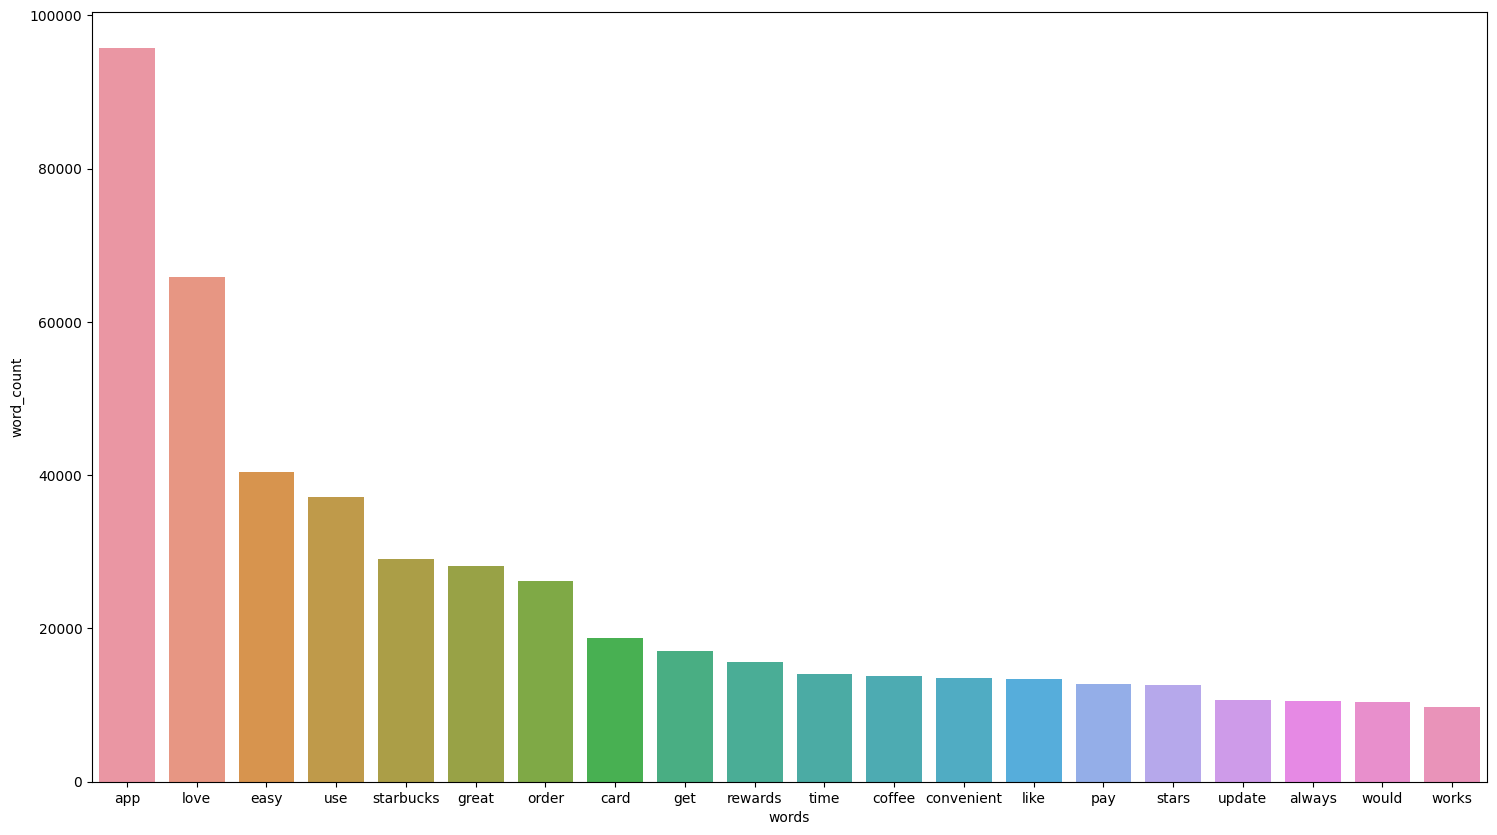

In [ ]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

### Export Clean Data

In [ ]:
dataclean1[['content','thumbsUpCount',"reviews_cleaned",'reviews_cleaned_stopwords']].to_csv("./cleaned_reviews_no_stopwords_data.csv",index = False)

# Analysing Part of Speech

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

### Load Data and Handling Missing Value

In [ ]:
dataclean2 = pd.read_csv("cleaned_reviews_no_stopwords_data.csv")

In [ ]:
dataclean2.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...


In [ ]:
dataclean2.isnull().sum()

content                       0
thumbsUpCount                 0
reviews_cleaned               0
reviews_cleaned_stopwords    93
dtype: int64

In [ ]:
dataclean2.dropna(inplace=True)
dataclean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214548 entries, 0 to 214640
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   content                    214548 non-null  object
 1   thumbsUpCount              214548 non-null  int64 
 2   reviews_cleaned            214548 non-null  object
 3   reviews_cleaned_stopwords  214548 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.2+ MB


In [ ]:
dataclean2.shape

(214548, 4)

### Tokenize Data

In [ ]:
dataclean2['reviews_tokenized'] = dataclean2['reviews_cleaned_stopwords'].apply(word_tokenize)

### Perform Part of Speech Tagging

In [ ]:
dataclean2['reviews_pos_tags'] = dataclean2['reviews_tokenized'].apply(nltk.tag.pos_tag)
dataclean2.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_pos_tags
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...,"[app, really, really, easy, use, love, way, ch...","[(app, NNS), (really, RB), (really, RB), (easy..."
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...,"[app, worked, fine, upgraded, new, pixel, 8, p...","[(app, NN), (worked, VBD), (fine, JJ), (upgrad..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...,"[pixel, 8, pro, app, allow, login, get, messag...","[(pixel, NN), (8, CD), (pro, JJ), (app, FW), (..."
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...,"[app, useful, reliable, ordering, redeeming, r...","[(app, RB), (useful, JJ), (reliable, JJ), (ord..."
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...,"[keeps, breaking, sign, month, finally, let, s...","[(keeps, NNS), (breaking, VBG), (sign, JJ), (m..."


In [ ]:
dataclean2['reviews_adjectives'] = dataclean2['reviews_pos_tags'].apply(lambda x: [word for (word, pos_tag) in x if 'JJ' in (word, pos_tag)])

### Visualise Most Common Adjectives

In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [ ]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [ ]:
reviews = dataclean2['reviews_adjectives']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['easy',
 'choose',
 'many',
 'choose',
 'pick',
 'drive-thru',
 'wish',
 'receive',
 'free',
 'fine']

In [ ]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
0,easy,37449
15,great,28171
33,app,17040
38,good,9136
10,new,7423


<Axes: xlabel='words', ylabel='word_count'>

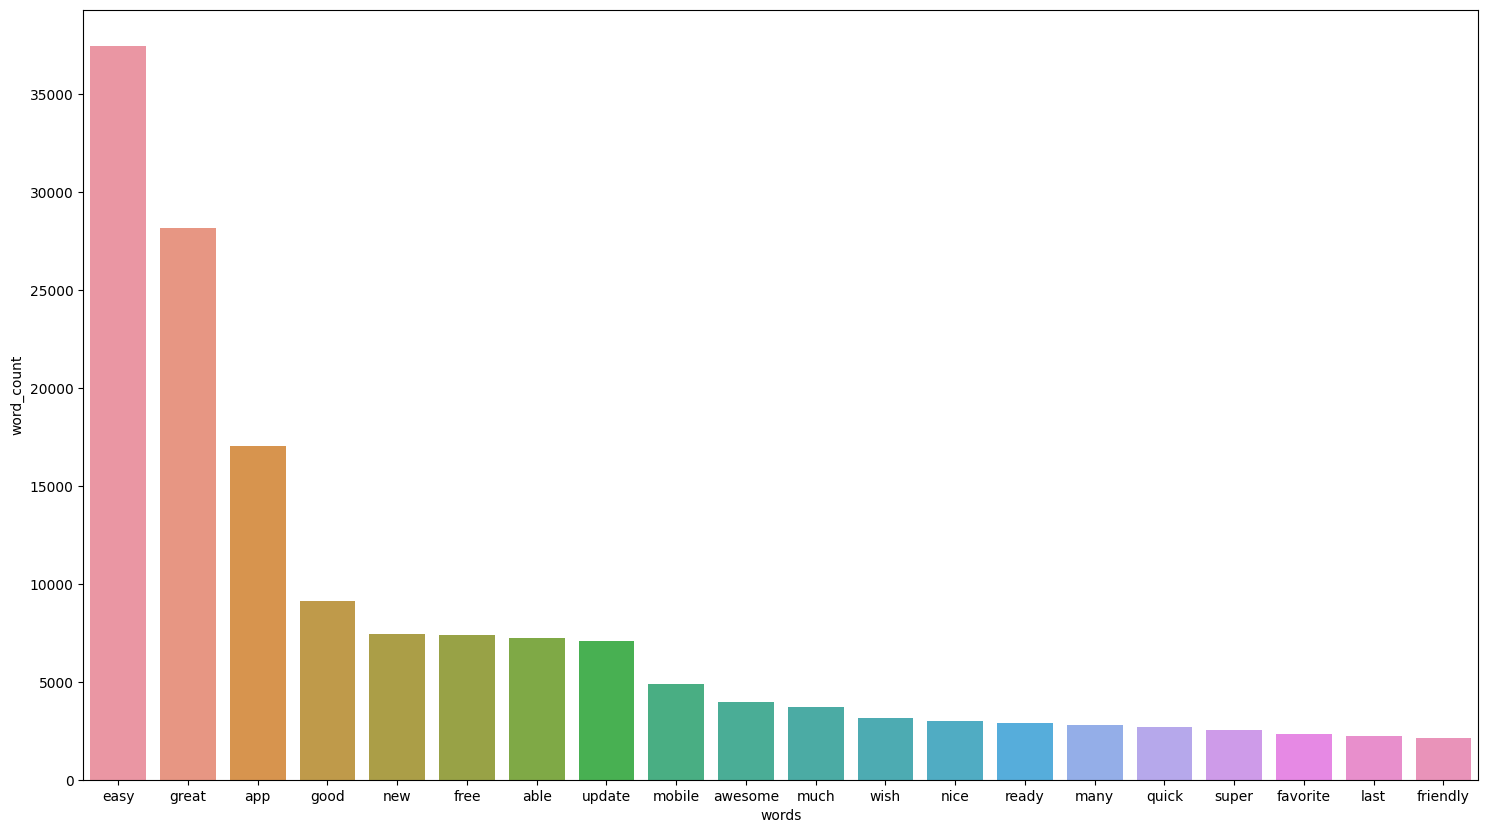

In [ ]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

# Performing Stemming dan Lemmatization

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### Load Data and Handling Missing Value

In [ ]:
dataclean3 = pd.read_csv("cleaned_reviews_no_stopwords_data.csv")
dataclean3.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...


In [ ]:
dataclean3.shape

(214641, 4)

In [ ]:
dataclean3.isnull().sum()

content                       0
thumbsUpCount                 0
reviews_cleaned               0
reviews_cleaned_stopwords    93
dtype: int64

In [ ]:
dataclean3.dropna(inplace=True)
dataclean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214548 entries, 0 to 214640
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   content                    214548 non-null  object
 1   thumbsUpCount              214548 non-null  int64 
 2   reviews_cleaned            214548 non-null  object
 3   reviews_cleaned_stopwords  214548 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.2+ MB


In [ ]:
dataclean3.dtypes

content                      object
thumbsUpCount                 int64
reviews_cleaned              object
reviews_cleaned_stopwords    object
dtype: object

### Tokenize Data

In [ ]:
dataclean3['reviews_tokenized'] = dataclean3['reviews_cleaned_stopwords'].apply(word_tokenize)

### Perform Stemming

In [ ]:
stemmer = nltk.PorterStemmer()
dataclean3['reviews_stemmed_data'] = dataclean3['reviews_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
dataclean3.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...,"[app, really, really, easy, use, love, way, ch...","[app, realli, realli, easi, use, love, way, ch..."
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...,"[app, worked, fine, upgraded, new, pixel, 8, p...","[app, work, fine, upgrad, new, pixel, 8, pro, ..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...,"[pixel, 8, pro, app, allow, login, get, messag...","[pixel, 8, pro, app, allow, login, get, messag..."
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...,"[app, useful, reliable, ordering, redeeming, r...","[app, use, reliabl, order, redeem, reward, rel..."
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...,"[keeps, breaking, sign, month, finally, let, s...","[keep, break, sign, month, final, let, sign, t..."


### Perform Lemmatization

In [ ]:
dataclean3['reviews_pos_tags'] = dataclean3['reviews_tokenized'].apply(nltk.tag.pos_tag)
dataclean3.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...,"[app, really, really, easy, use, love, way, ch...","[app, realli, realli, easi, use, love, way, ch...","[(app, NNS), (really, RB), (really, RB), (easy..."
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...,"[app, worked, fine, upgraded, new, pixel, 8, p...","[app, work, fine, upgrad, new, pixel, 8, pro, ...","[(app, NN), (worked, VBD), (fine, JJ), (upgrad..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...,"[pixel, 8, pro, app, allow, login, get, messag...","[pixel, 8, pro, app, allow, login, get, messag...","[(pixel, NN), (8, CD), (pro, JJ), (app, FW), (..."
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...,"[app, useful, reliable, ordering, redeeming, r...","[app, use, reliabl, order, redeem, reward, rel...","[(app, RB), (useful, JJ), (reliable, JJ), (ord..."
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...,"[keeps, breaking, sign, month, finally, let, s...","[keep, break, sign, month, final, let, sign, t...","[(keeps, NNS), (breaking, VBG), (sign, JJ), (m..."


In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

dataclean3['reviews_wordnet_pos_tags'] = dataclean3['reviews_pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
dataclean3.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...,"[app, really, really, easy, use, love, way, ch...","[app, realli, realli, easi, use, love, way, ch...","[(app, NNS), (really, RB), (really, RB), (easy...","[(app, n), (really, r), (really, r), (easy, a)..."
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...,"[app, worked, fine, upgraded, new, pixel, 8, p...","[app, work, fine, upgrad, new, pixel, 8, pro, ...","[(app, NN), (worked, VBD), (fine, JJ), (upgrad...","[(app, n), (worked, v), (fine, a), (upgraded, ..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...,"[pixel, 8, pro, app, allow, login, get, messag...","[pixel, 8, pro, app, allow, login, get, messag...","[(pixel, NN), (8, CD), (pro, JJ), (app, FW), (...","[(pixel, n), (8, n), (pro, a), (app, n), (allo..."
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...,"[app, useful, reliable, ordering, redeeming, r...","[app, use, reliabl, order, redeem, reward, rel...","[(app, RB), (useful, JJ), (reliable, JJ), (ord...","[(app, r), (useful, a), (reliable, a), (orderi..."
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...,"[keeps, breaking, sign, month, finally, let, s...","[keep, break, sign, month, final, let, sign, t...","[(keeps, NNS), (breaking, VBG), (sign, JJ), (m...","[(keeps, n), (breaking, v), (sign, a), (month,..."


In [ ]:
lemmatizer = WordNetLemmatizer()
dataclean3['reviews_lemmatized'] = dataclean3['reviews_wordnet_pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
dataclean3.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...,"[app, really, really, easy, use, love, way, ch...","[app, realli, realli, easi, use, love, way, ch...","[(app, NNS), (really, RB), (really, RB), (easy...","[(app, n), (really, r), (really, r), (easy, a)...","[app, really, really, easy, use, love, way, ch..."
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...,"[app, worked, fine, upgraded, new, pixel, 8, p...","[app, work, fine, upgrad, new, pixel, 8, pro, ...","[(app, NN), (worked, VBD), (fine, JJ), (upgrad...","[(app, n), (worked, v), (fine, a), (upgraded, ...","[app, work, fine, upgraded, new, pixel, 8, pro..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...,"[pixel, 8, pro, app, allow, login, get, messag...","[pixel, 8, pro, app, allow, login, get, messag...","[(pixel, NN), (8, CD), (pro, JJ), (app, FW), (...","[(pixel, n), (8, n), (pro, a), (app, n), (allo...","[pixel, 8, pro, app, allow, login, get, messag..."
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...,"[app, useful, reliable, ordering, redeeming, r...","[app, use, reliabl, order, redeem, reward, rel...","[(app, RB), (useful, JJ), (reliable, JJ), (ord...","[(app, r), (useful, a), (reliable, a), (orderi...","[app, useful, reliable, order, redeeming, rewa..."
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...,"[keeps, breaking, sign, month, finally, let, s...","[keep, break, sign, month, final, let, sign, t...","[(keeps, NNS), (breaking, VBG), (sign, JJ), (m...","[(keeps, n), (breaking, v), (sign, a), (month,...","[keep, break, sign, month, finally, let, sign,..."


In [ ]:
dataclean3['reviews_cleaned_lemmatized'] = [' '.join(l) for l in dataclean3['reviews_lemmatized']]
dataclean3.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized,reviews_cleaned_lemmatized
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...,"[app, really, really, easy, use, love, way, ch...","[app, realli, realli, easi, use, love, way, ch...","[(app, NNS), (really, RB), (really, RB), (easy...","[(app, n), (really, r), (really, r), (easy, a)...","[app, really, really, easy, use, love, way, ch...",app really really easy use love way choose cus...
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...,"[app, worked, fine, upgraded, new, pixel, 8, p...","[app, work, fine, upgrad, new, pixel, 8, pro, ...","[(app, NN), (worked, VBD), (fine, JJ), (upgrad...","[(app, n), (worked, v), (fine, a), (upgraded, ...","[app, work, fine, upgraded, new, pixel, 8, pro...",app work fine upgraded new pixel 8 pro android...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...,"[pixel, 8, pro, app, allow, login, get, messag...","[pixel, 8, pro, app, allow, login, get, messag...","[(pixel, NN), (8, CD), (pro, JJ), (app, FW), (...","[(pixel, n), (8, n), (pro, a), (app, n), (allo...","[pixel, 8, pro, app, allow, login, get, messag...",pixel 8 pro app allow login get message `` sys...
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...,"[app, useful, reliable, ordering, redeeming, r...","[app, use, reliabl, order, redeem, reward, rel...","[(app, RB), (useful, JJ), (reliable, JJ), (ord...","[(app, r), (useful, a), (reliable, a), (orderi...","[app, useful, reliable, order, redeeming, rewa...",app useful reliable order redeeming reward rel...
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...,"[keeps, breaking, sign, month, finally, let, s...","[keep, break, sign, month, final, let, sign, t...","[(keeps, NNS), (breaking, VBG), (sign, JJ), (m...","[(keeps, n), (breaking, v), (sign, a), (month,...","[keep, break, sign, month, finally, let, sign,...",keep break sign month finally let sign try sig...


### Visualise Most Common Words with Lemmatized Data

In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [ ]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [ ]:
reviews = dataclean3['reviews_lemmatized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['app',
 'really',
 'really',
 'easy',
 'use',
 'love',
 'way',
 'choose',
 'customize',
 'anything']

In [ ]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
0,app,95697
4,love,67285
3,use,45749
2,easy,45011
87,order,38509


<Axes: xlabel='words', ylabel='word_count'>

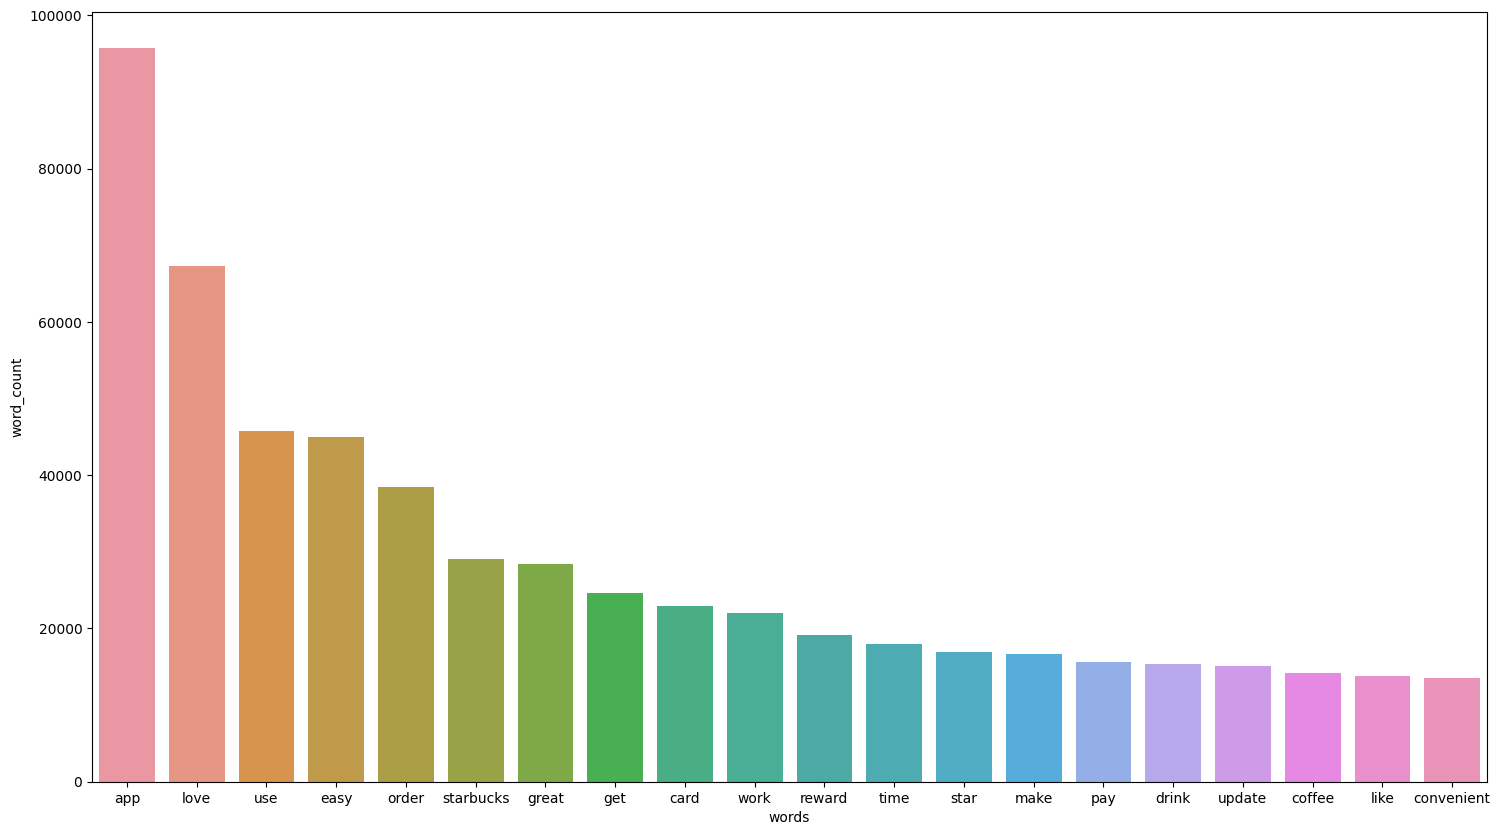

In [ ]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

### Export Cleaned Data

In [ ]:
dataclean3[['content','thumbsUpCount','reviews_cleaned_lemmatized',"reviews_cleaned"]].to_csv("cleaned_reviews_lemmatized_data.csv",index = False)

# Analysing Ngrams

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk import ngrams

### Load Data and Handling Missing Value

In [ ]:
dataclean4 = pd.read_csv("cleaned_reviews_no_stopwords_data.csv")
dataclean4.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...


In [ ]:
dataclean4.isnull().sum()

content                       0
thumbsUpCount                 0
reviews_cleaned               0
reviews_cleaned_stopwords    93
dtype: int64

In [ ]:
dataclean4.dropna(inplace=True)
dataclean4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214548 entries, 0 to 214640
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   content                    214548 non-null  object
 1   thumbsUpCount              214548 non-null  int64 
 2   reviews_cleaned            214548 non-null  object
 3   reviews_cleaned_stopwords  214548 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.2+ MB


In [ ]:
dataclean4.shape

(214548, 4)

### Tokenized Data

In [ ]:
dataclean4['reviews_tokenized'] = dataclean4['reviews_cleaned_stopwords'].apply(word_tokenize)

### Exctract Ngrams

In [ ]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

In [ ]:
dataclean4['reviews_ngrams'] = dataclean4['reviews_tokenized'].apply(lambda x: extract_ngrams(x, 2))
dataclean4.head()

,content,thumbsUpCount,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_ngrams
0,"The app is really, really easy to use and I lo...",7,the app is really really easy to use and i lov...,app really really easy use love way choose cus...,"[app, really, really, easy, use, love, way, ch...","[app really, really really, really easy, easy ..."
1,This app worked just fine until I upgraded to ...,442,this app worked just fine until i upgraded to ...,app worked fine upgraded new pixel 8 pro andro...,"[app, worked, fine, upgraded, new, pixel, 8, p...","[app worked, worked fine, fine upgraded, upgra..."
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro here app does not allow me to logi...,pixel 8 pro app allow login get message `` sys...,"[pixel, 8, pro, app, allow, login, get, messag...","[pixel 8, 8 pro, pro app, app allow, allow log..."
3,"The app is useful and reliable for ordering, r...",140,the app is useful and reliable for ordering re...,app useful reliable ordering redeeming rewards...,"[app, useful, reliable, ordering, redeeming, r...","[app useful, useful reliable, reliable orderin..."
4,Keeps breaking where I can't sign in for a mon...,278,keeps breaking where i can not sign in for a m...,keeps breaking sign month finally let sign try...,"[keeps, breaking, sign, month, finally, let, s...","[keeps breaking, breaking sign, sign month, mo..."


### Visualise Most Common Ngrams

In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [ ]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:10]

In [ ]:
reviews = dataclean4['reviews_ngrams']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['app really',
 'really really',
 'really easy',
 'easy use',
 'use love',
 'love way',
 'way choose',
 'choose customize',
 'customize anything',
 'anything menu']

In [ ]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
3,easy use,20827
432,love app,13892
3404,great app,7741
3942,love starbucks,6495
433,app easy,4576


<Axes: xlabel='words', ylabel='word_count'>

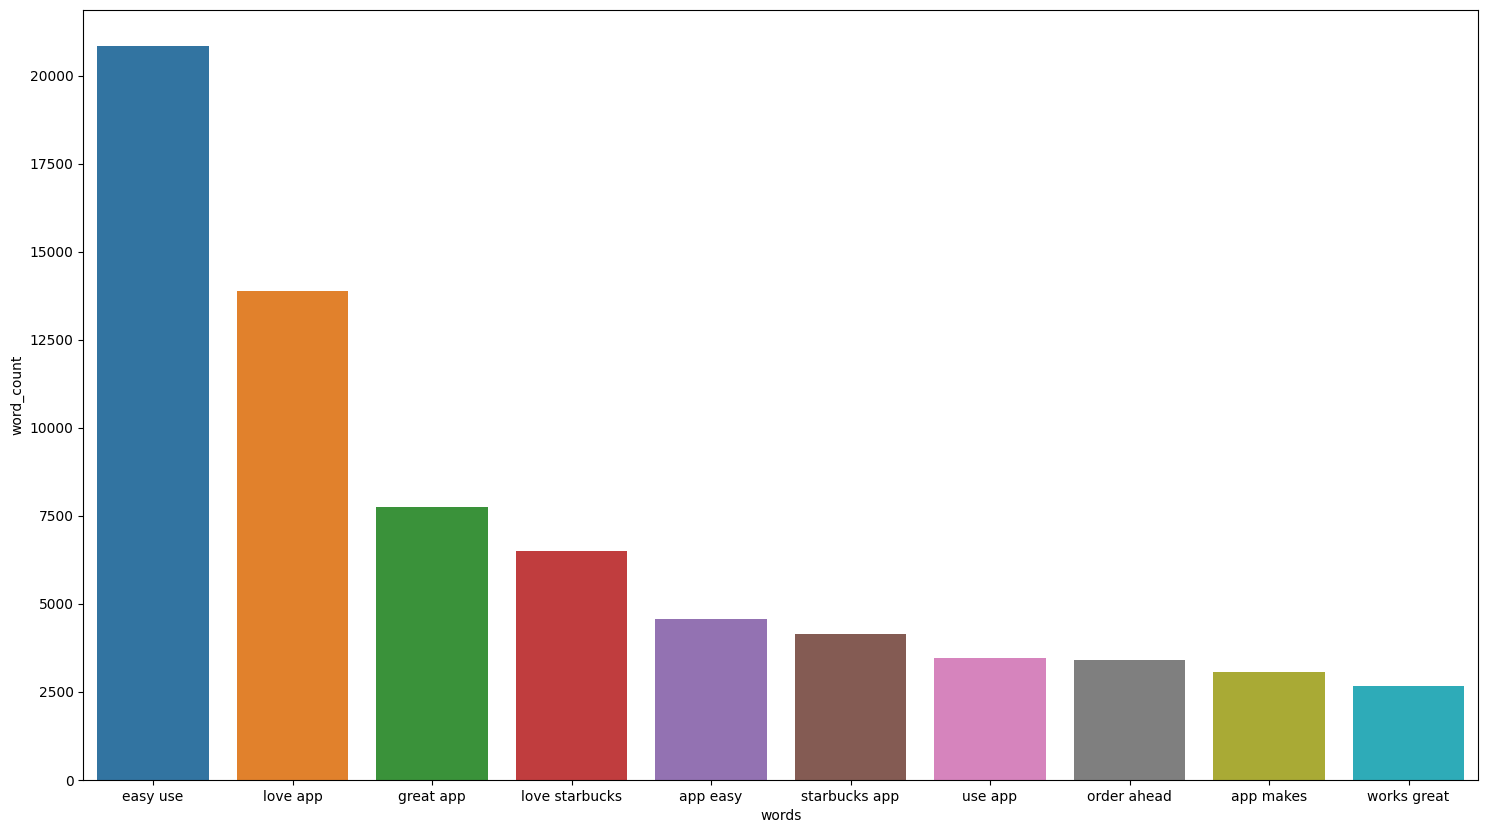

In [ ]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

# Creating Word Clouds

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

### Load Data and Handling Missing Value

In [ ]:
dataclean5 = pd.read_csv("cleaned_reviews_lemmatized_data.csv")
dataclean5.head()

,content,thumbsUpCount,reviews_cleaned_lemmatized,reviews_cleaned
0,"The app is really, really easy to use and I lo...",7,app really really easy use love way choose cus...,the app is really really easy to use and i lov...
1,This app worked just fine until I upgraded to ...,442,app work fine upgraded new pixel 8 pro android...,this app worked just fine until i upgraded to ...
2,Pixel 8 Pro here. App doesn't allow me to logi...,229,pixel 8 pro app allow login get message `` sys...,pixel 8 pro here app does not allow me to logi...
3,"The app is useful and reliable for ordering, r...",140,app useful reliable order redeeming reward rel...,the app is useful and reliable for ordering re...
4,Keeps breaking where I can't sign in for a mon...,278,keep break sign month finally let sign try sig...,keeps breaking where i can not sign in for a m...


In [ ]:
dataclean5.isnull().sum()

content                       0
thumbsUpCount                 0
reviews_cleaned_lemmatized    0
reviews_cleaned               0
dtype: int64

In [ ]:
dataclean5.shape

(214548, 4)

### Tokenize Data

In [ ]:
dataclean5['reviews_tokenized'] = dataclean5['reviews_cleaned_lemmatized'].apply(word_tokenize)

### Visualise most common words with lemmatized data

In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [ ]:
reviews = dataclean5['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['app',
 'really',
 'really',
 'easy',
 'use',
 'love',
 'way',
 'choose',
 'customize',
 'anything']

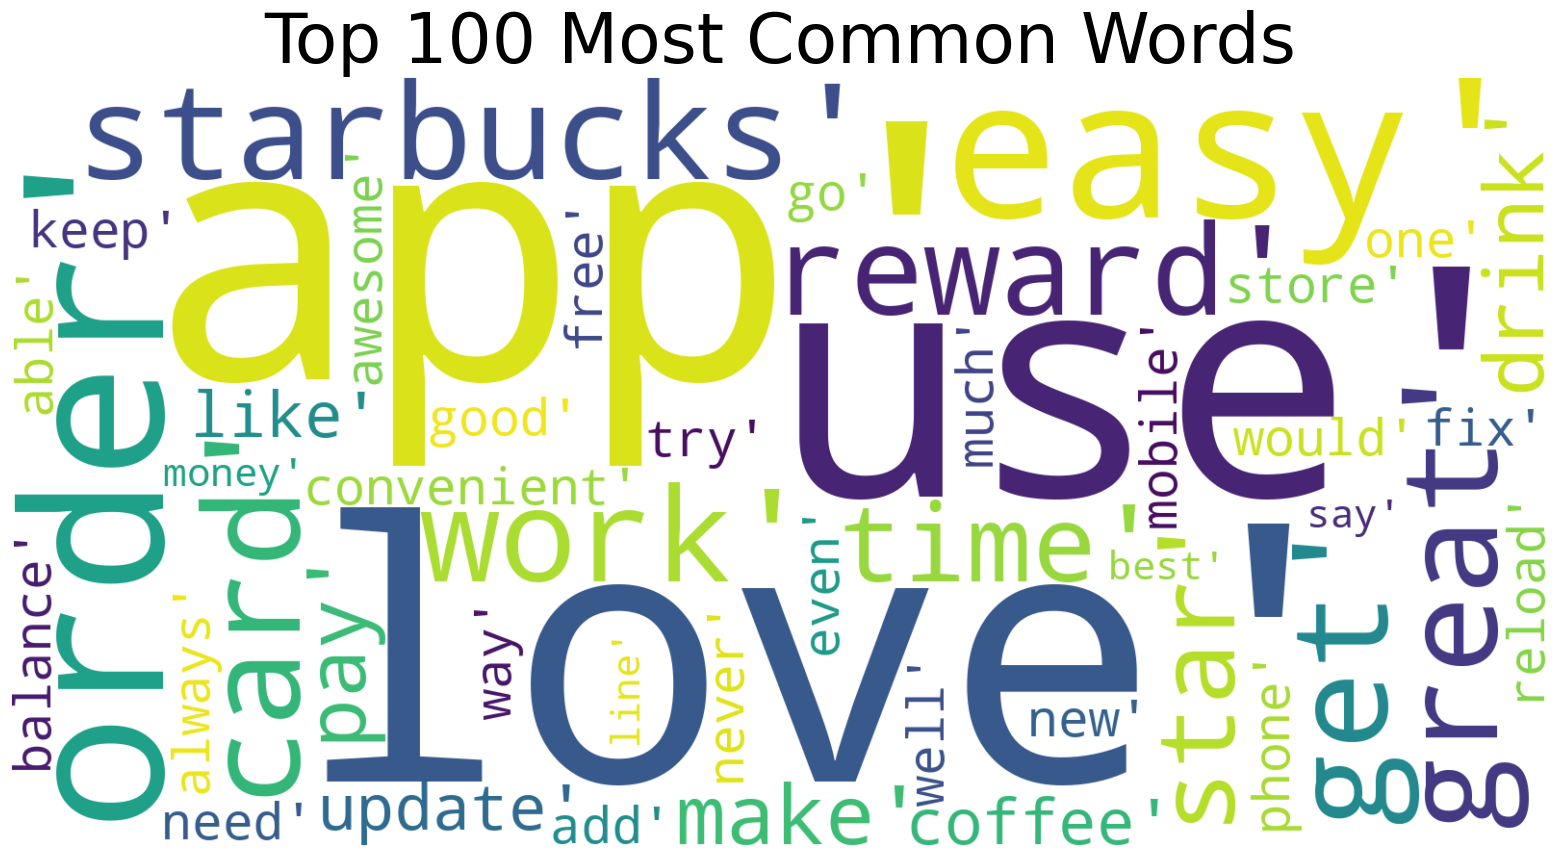

In [ ]:
mostcommon = FreqDist(reviews_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.show()